# TMDB Movie Analysis

> *This dataset is from [Kaggle: TMDb Movies Dataset](https://www.kaggle.com/datasets/juzershakir/tmdb-movies-dataset) and contains information about 10k movies collected from The Movie Database (TMDb), including user ratings and revenue.*

---

## Exploratory Data Analysis


Based on the dataset, the goal of this project is to answer:

**Question #1**: which actors have the most appearances in films? <br>
**Question #2**: which genre was most popular through the years? <br>
**Question #3**: which are the top movies based on popularity? <br>
**Question #4**: which director produces the highest revenue movies? <br>
**Question #5**: what kind of properties are associated with movies that have high revenues? <br>

---

## Data Preparation

In [1]:
# Importing libraries.

import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset.

tmdb = pd.read_csv('tmdb_movies_data.csv')

In [3]:
# Printing the firt rows of the TMDB movies dataset.

tmdb.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [4]:
# Printing the size of the TMDB movies dataset.

print(f'The dataset has {tmdb.shape[0]} rows and {tmdb.shape[1]} columns')

The dataset has 10866 rows and 21 columns


In [5]:
# Looking for null values in the TMDB movies dataset.

tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## **Question #1**: which actors have the most appearances in films? <br>


In [6]:
# Printing the first row of the 'actors' column in the TMDB credits dataset to check how it's structured.

tmdb['cast'][0]

"Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson"

In [7]:
# Adding all actors in a list.

all_actors = []

for i in range(tmdb.shape[0]):
    actors = []
    if pd.isna(tmdb['cast'][i]) == False:
        actors.append(tmdb['cast'][i].split('|'))
        for actor in actors:
            for i in range(len(actors)):
                all_actors.append(actor[i])

In [8]:
# Counting actors in all_actors list.

actors_count = Counter(all_actors)

In [9]:
# Sorting by the most common actors.

most_common = actors_count.most_common(10)

most_common

[('Nicolas Cage', 50),
 ('Robert De Niro', 42),
 ('Bruce Willis', 39),
 ('Clint Eastwood', 38),
 ('Tom Hanks', 37),
 ('Johnny Depp', 37),
 ('Sylvester Stallone', 37),
 ('Jean-Claude Van Damme', 35),
 ('Steven Seagal', 35),
 ('Denzel Washington', 33)]

In [10]:
# Creating a dataframe.

df_actors_count = pd.DataFrame(most_common, 
                               columns = ['actor', 'count'])

df_actors_count

,actor,count
0,Nicolas Cage,50
1,Robert De Niro,42
2,Bruce Willis,39
3,Clint Eastwood,38
4,Tom Hanks,37
5,Johnny Depp,37
6,Sylvester Stallone,37
7,Jean-Claude Van Damme,35
8,Steven Seagal,35
9,Denzel Washington,33


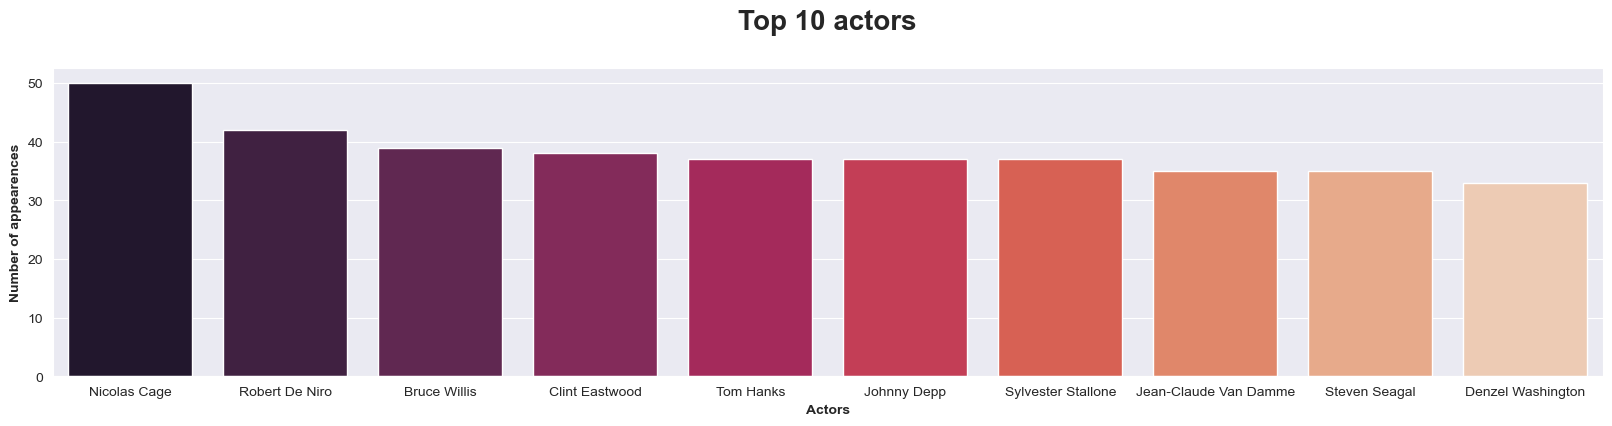

In [11]:
# Creating a barplot.

sns.set_style('darkgrid')

plt.figure(figsize=(20,4))

ax = sns.barplot(y = 'count', 
                x = 'actor', 
                data = df_actors_count,
                color = sns.set_palette('rocket', 10))

ax.set_ylabel('Number of appearences', 
             fontweight = 'bold')

ax.set_xlabel('Actors', 
             fontweight = 'bold')

ax.set_title('Top 10 actors',             
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax = ax

In [12]:
print(f'The most appeared actors are {df_actors_count["actor"][0]}, {df_actors_count["actor"][1]} and {df_actors_count["actor"][2]}.')

The most appeared actors are Nicolas Cage, Robert De Niro and Bruce Willis.


## **Question #2**: which genre was most popular through the years? <br>


In [13]:
# Printing the first row of the 'genres' column in the TMDB credits dataset to check how it's structured.

tmdb['genres'][0]

'Action|Adventure|Science Fiction|Thriller'

In [14]:
# Adding genres by year in a dataframe.

genres_by_year = []
genres = []
years = []

for i in range(tmdb.shape[0]):
    if pd.isna(tmdb['genres'][i]) == False:
        years.append(tmdb['release_year'][i]) 
        genres.append(tmdb['genres'][i].split('|'))
                
genres_by_year = pd.DataFrame([years, genres]).T
genres_by_year.rename(columns = {0: "year", 1: "genres"}, inplace = True)

genres_by_year = genres_by_year.groupby('year')['genres'].apply(lambda x: x.sum())

genres_by_year = pd.DataFrame(genres_by_year)

genres_by_year.head(5)

,genres
year,
1960,"[Drama, Horror, Thriller, Action, Adventure, W..."
1961,"[Adventure, Animation, Comedy, Family, Comedy,..."
1962,"[Adventure, Action, Thriller, Adventure, Drama..."
1963,"[Action, Thriller, Adventure, Animation, Famil..."
1964,"[Adventure, Action, Thriller, Drama, Comedy, W..."


In [15]:
# Getting only the most popular genre by year.

for index in genres_by_year.index:
    genres_by_year['genres'][index] = (Counter(genres_by_year['genres'][index]).most_common(1)[0][0])
    
genres_by_year.head(10)

,genres
year,
1960,Drama
1961,Drama
1962,Drama
1963,Comedy
1964,Drama
1965,Drama
1966,Comedy
1967,Comedy
1968,Drama


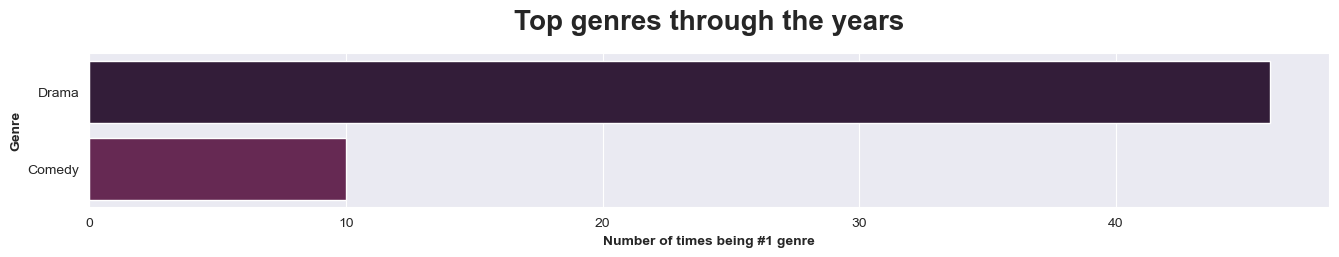

In [16]:
# Creating a barplot.

sns.set_style('darkgrid')

plt.figure(figsize=(16,2))

ax = sns.countplot(y = 'genres',
                  data = genres_by_year,
                  color = sns.set_palette('rocket'),
                  orient = 'vertical')

ax.set_ylabel('Genre', 
             fontweight = 'bold')

ax.set_xlabel('Number of times being #1 genre', 
             fontweight = 'bold')

ax.set_title('Top genres through the years',             
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax = ax

In [17]:
print(f'The most popular genre through the years is {Counter(genres_by_year["genres"]).most_common(1)[0][0]}.')

The most popular genre through the years is Drama.


## **Question #3**: which are the top movies based on popularity? 

In [18]:
# Printing the top 5 most popular movies.

most_popular = tmdb[['original_title', 'popularity']].sort_values('popularity', ascending = False).head(5).reset_index(drop = True)

most_popular

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
2,Interstellar,24.949134
3,Guardians of the Galaxy,14.311205
4,Insurgent,13.112507


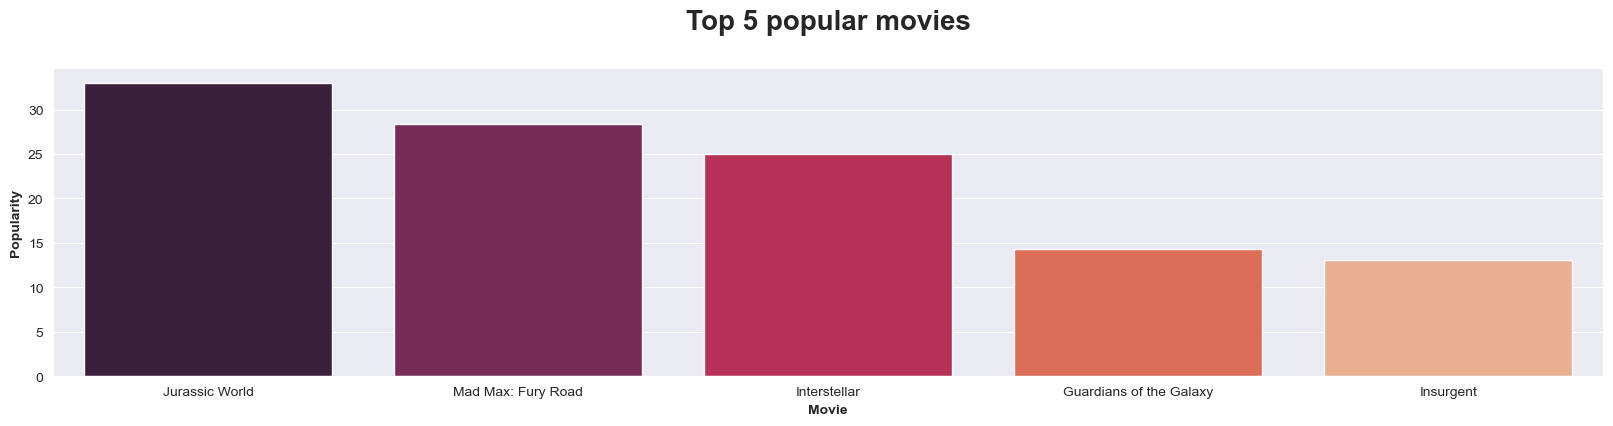

In [19]:
# Creating a barplot.

sns.set_style('darkgrid')

plt.figure(figsize=(20,4))

ax = sns.barplot(y = 'popularity', 
                x = 'original_title', 
                data = most_popular,
                color = sns.set_palette('rocket', 5))

ax.set_ylabel('Popularity', 
             fontweight = 'bold')

ax.set_xlabel('Movie', 
             fontweight = 'bold')

ax.set_title('Top 5 popular movies',             
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax = ax

In [20]:
print(f'Some of the most popular movies are {most_popular["original_title"][0]}, {most_popular["original_title"][1]} and {most_popular["original_title"][2]}.')

Some of the most popular movies are Jurassic World, Mad Max: Fury Road and Interstellar.


## **Question #4**: which director produces the highest revenue movies? <br>


In [21]:
# Printing the first rows of the 'director' column to check how it's structured.

tmdb[['director', 'revenue']].head(10)

,director,revenue
0,Colin Trevorrow,1513528810
1,George Miller,378436354
2,Robert Schwentke,295238201
3,J.J. Abrams,2068178225
4,James Wan,1506249360
5,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,532950503
6,Alan Taylor,440603537
7,Ridley Scott,595380321
8,Kyle Balda|Pierre Coffin,1156730962
9,Pete Docter,853708609


In [22]:
# Creating a list in the director column, since directors are currently separeted by "|".

tmdb['director'] = tmdb['director'].str.split('|')

tmdb[['director', 'revenue']].head(10)

,director,revenue
0,[Colin Trevorrow],1513528810
1,[George Miller],378436354
2,[Robert Schwentke],295238201
3,[J.J. Abrams],2068178225
4,[James Wan],1506249360
5,[Alejandro GonzÃ¡lez IÃ±Ã¡rritu],532950503
6,[Alan Taylor],440603537
7,[Ridley Scott],595380321
8,"[Kyle Balda, Pierre Coffin]",1156730962
9,[Pete Docter],853708609


In [23]:
# Creating a new dataframe with one director by row only.

tmdb_directors = tmdb.explode('director').reset_index()

tmdb_directors[['director', 'revenue']].head(10)

,director,revenue
0,Colin Trevorrow,1513528810
1,George Miller,378436354
2,Robert Schwentke,295238201
3,J.J. Abrams,2068178225
4,James Wan,1506249360
5,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,532950503
6,Alan Taylor,440603537
7,Ridley Scott,595380321
8,Kyle Balda,1156730962
9,Pierre Coffin,1156730962


In [24]:
# Grouping revenue by director and selecting the top 5 directors.

tmdb_directors = tmdb_directors[['director', 'revenue']].groupby('director').sum().sort_values('revenue', ascending = False).head(5).reset_index()

tmdb_directors

,director,revenue
0,Steven Spielberg,9048014691
1,Peter Jackson,6523244659
2,James Cameron,5841894863
3,Michael Bay,4917208171
4,Christopher Nolan,4167548502


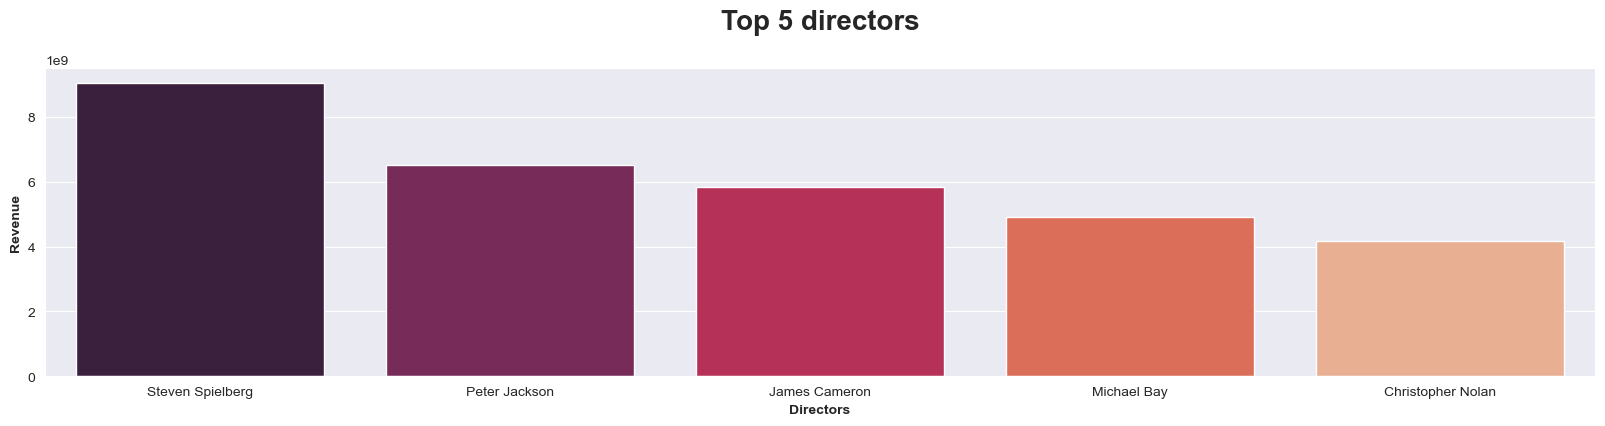

In [25]:
# Creating a barplot.

sns.set_style('darkgrid')

plt.figure(figsize=(20,4))

ax = sns.barplot(y = 'revenue', 
                x = 'director', 
                data = tmdb_directors,
                color = sns.set_palette('rocket', 5))

ax.set_ylabel('Revenue', 
             fontweight = 'bold')

ax.set_xlabel('Directors', 
             fontweight = 'bold')

ax.set_title('Top 5 directors',             
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax = ax

In [26]:
print(f'The top 5 directors are {tmdb_directors["director"][0]}, {tmdb_directors["director"][1]} and {tmdb_directors["director"][2]}.')

The top 5 directors are Steven Spielberg, Peter Jackson and James Cameron.


## **Question #5**: what kind of properties are associated with movies that have high revenues? <br>

In [27]:
# Creating a df with possible properties correlated with revenue.

tmdb_corr = tmdb[['revenue', 'popularity', 'budget', 'runtime']]

tmdb_corr.head(5)

,revenue,popularity,budget,runtime
0,1513528810,32.985763,150000000,124
1,378436354,28.419936,150000000,120
2,295238201,13.112507,110000000,119
3,2068178225,11.173104,200000000,136
4,1506249360,9.335014,190000000,137


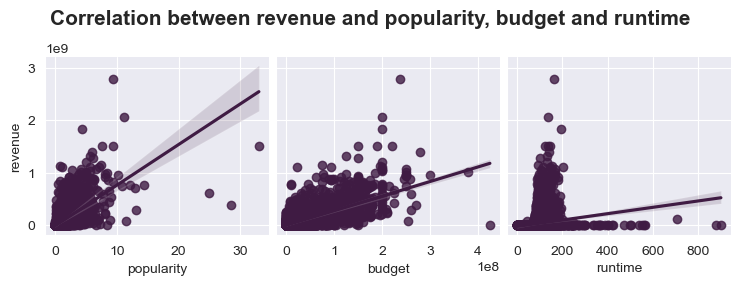

In [28]:
# Creating a pairplot.

sns.set_style('darkgrid')

ax = sns.pairplot(data = tmdb_corr,
                  kind="reg",
                  x_vars = ['popularity', 'budget', 'runtime'],
                  y_vars = ['revenue'])

ax.fig.suptitle('Correlation between revenue and popularity, budget and runtime',             
             fontweight = 'bold', 
             fontsize = 15, 
             y = 1.1)

ax = ax

Seems like there's a positive correlation between revenue and popularity, a strong and positive correlation between revenue and budget, and a weak correlation between revenue and runtime. 

We can also create a correlation matrix like the one below:

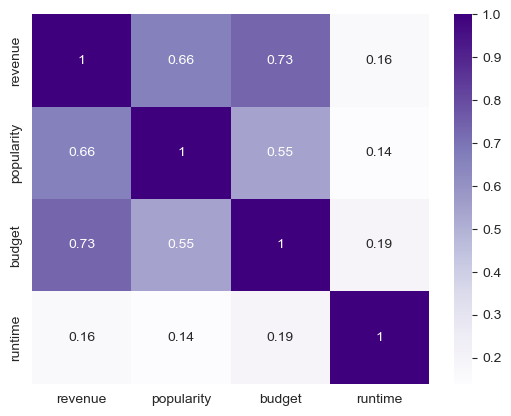

In [29]:
corr_matrix = tmdb_corr.corr()

sns.heatmap(corr_matrix, 
            annot=True, 
            cmap = 'Purples')

plt.show()

## Conclusion

By answering the project's questions, we were able to reach some conclusions about the TMDB film database:

- The most appeared actors are Nicolas Cage, Robert De Niro and Bruce Willis.
- The most popular genre through the years is Drama.
- Some of the most popular movies are Jurassic World, Mad Max: Fury Road and Interstellar.
- The top 5 directors are Steven Spielberg, Peter Jackson and James Cameron.
- Seems like there's a positive correlation between revenue and popularity, a strong and positive correlation between revenue and budget, and a weak correlation between revenue and runtime.
